# Monte Carlo Simulation for Hard Disks

This notebook sets simulation parameters, runs the Monte Carlo algorithm (imported from `mc_algorithm.py`), and then plots and visualizes the results.


### Initialize Simulation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mc_algorithm import run_mc
from plots import plot_results
from visualize import visualize

# Settings
runs = 100
N = 224
A = 1.0
L = np.sqrt(A)
rows, columns, nu = 16, 14, 7

d = 1/columns
d0 = d * (1 - 2**(nu-8))
alpha = d - d0
bins = 64
K = 1.5
dAsqd = (K**2 - 1) * np.pi * d0**2 / bins
histogram = np.zeros((bins, 2))
histogram[:, 0] = np.arange(1, bins+1) * np.sqrt(dAsqd / np.pi)

dx = d
dy = d * np.sqrt(3) / 2
r = np.zeros((N, 2))
for jj in range(rows):
    for ii in range(columns):
        idx = ii + jj * columns
        r[idx, 0] = ii * dx + (jj % 2) * dx / 2
        r[idx, 1] = jj * dy
r0 = r.copy()

# input("Initialized. Press Enter to run simulation...")

### Run Simulation

In [13]:
# Run Monte Carlo algorithm from separate file
r, histogram = run_mc(r, runs, N, d0, alpha, L, bins, dAsqd, histogram)
# np.save('Monte.npy', r)
# np.save('histogram.npy', histogram)

### Plot Initial Condition

Text(0.5, 1.0, 'Hard disks in initial state')

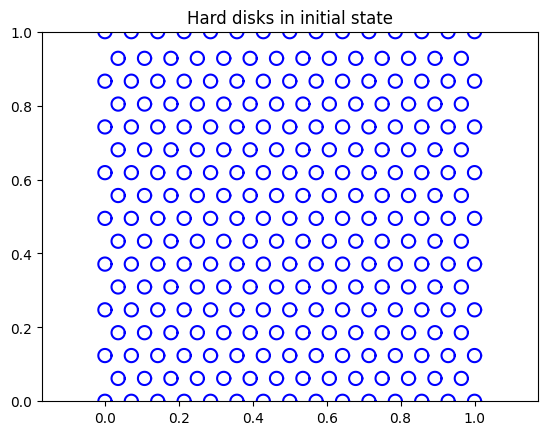

In [14]:
# Plot and visualize results
plt.close('all')
    
visualize(r0, d0, L)
plt.title('Hard disks in initial state')
# plt.savefig('pre_sim.png')

### Plot End State

Text(0.5, 1.0, 'Hard disks after simulation')

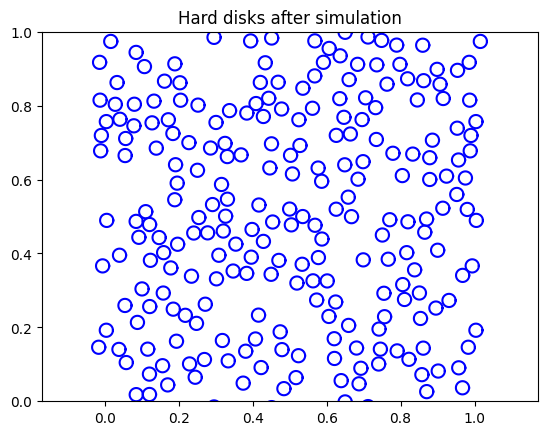

In [15]:
visualize(r, d0, L)
plt.title('Hard disks after simulation')
# plt.savefig('post_sim.png')

### RDF for gas state

Text(0, 0.5, 'g(r)')

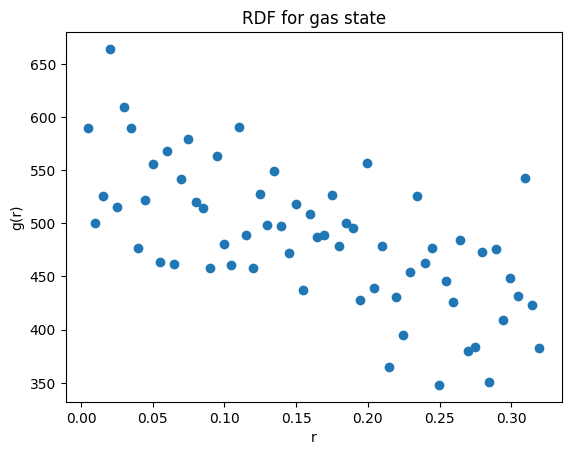

In [16]:
plt.figure()
plt.plot(histogram[:,0], histogram[:,1], 'o')
plt.title('RDF for gas state')
plt.xlabel('r')
plt.ylabel('g(r)')
# plt.savefig('rdf.png')

### Pressure v. r for gas state

Text(0, 0.5, 'PA/(N*kb*T)')

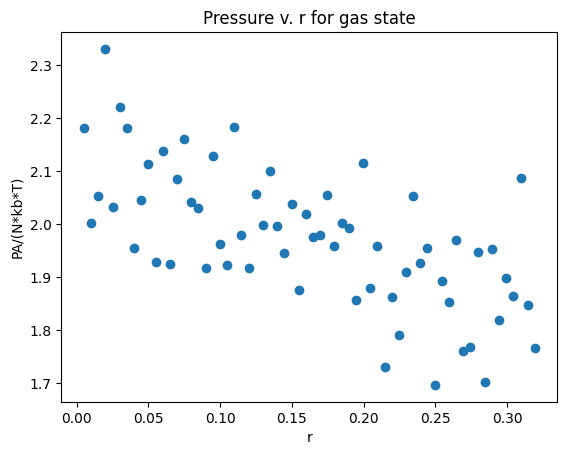

In [17]:
plt.figure()
plt.plot(histogram[:,0], 1 + np.pi*d0**2*histogram[:,1]/2, 'o')
plt.title('Pressure v. r for gas state')
plt.xlabel('r')
plt.ylabel('PA/(N*kb*T)')
# plt.savefig('pressure.png')